In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchdiffeq import odeint

# Define a deeper ODE function with multiple layers
class DeepODEFunc(nn.Module):
    def __init__(self, hidden_dim=256):
        super(DeepODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )
    
    def forward(self, t, x):
        return self.net(x)

# ODE Block with multiple layers
class DeepODEBlock(nn.Module):
    def __init__(self, hidden_dim=256):
        super(DeepODEBlock, self).__init__()
        self.odefunc = DeepODEFunc(hidden_dim)
    
    def forward(self, x):
        t = torch.tensor([0, 1], dtype=torch.float32)  # Define ODE time range
        return odeint(self.odefunc, x, t)[-1]  # Solve ODE

# Convolutional feature extraction for 256x256 RGB images
class CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super(CNNFeatureExtractor, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),  # RGB input
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample 256 → 128
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample 128 → 64
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsample 64 → 32
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  # Downsample 32 → 16
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        return x.view(x.size(0), -1)  # Flatten for ODE input

# Advanced Neural ODE model with CNN and multiple ODE layers
class AdvancedNeuralODE(nn.Module):
    def __init__(self, hidden_dim=256, output_dim=17):
        super(AdvancedNeuralODE, self).__init__()
        self.cnn = CNNFeatureExtractor()
        self.fc1 = nn.Linear(512 * 16 * 16, hidden_dim)  # Adjust for image size after CNN
        self.odeblock1 = DeepODEBlock(hidden_dim)
        self.odeblock2 = DeepODEBlock(hidden_dim)  # Second ODE block
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Output layer for 17 classes

    def forward(self, x):
        x = self.cnn(x)  # CNN feature extraction
        x = self.fc1(x)
        x = self.odeblock1(x)  # First ODE Block
        x = self.odeblock2(x)  # Second ODE Block
        x = self.fc2(x)
        return x

model = AdvancedNeuralODE()
outputs = model(torch.randn(2, 3, 256, 256))
outputs.shape

torch.Size([2, 17])

In [3]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
from dl_utils.utils.dataset import viz_dataloader, split_train_valid, hdf5_dataset
from dl_utils.training.build_model import xcit_small
from dl_utils.training.trainer import Trainer, accuracy
from dl_utils.packed_functions import benchmark_task

ds_path_info = {'imagenet': '../../datasets/imagenet_v5_rot_10m_fix_vector.h5',
                'noise': '../../datasets/noise_v5_rot_1m_fix_vector.h5',
                'atom': '../../datasets/atom_v5_rot_1m_fix_vector.h5',
                'viz_dataloader': False}

training_specs = {'batch_size': 300, 
                  'num_workers': 12, 
                  'device_ids': [4,5,6,7], 
                  'shuffle': True,
                  'learning_rate': 1e-3,
                  'epochs': 1000,
                  'validation_times': 200,
                  'training_image_count': 10000000*20, # 20 epochs of 10 million images of full imagenet dataset
                  'efficient_print': True,
                  'model_path': '../../models/'}


config = {'loss_func': 'CrossEntropyLoss', # nn.MSELoss()
          'optimizer': 'Adam',
          'scheduler': 'OneCycleLR'}
    
wandb_specs = {'config': config,
                'project': 'Understanding-Experimental-Images-by-Identifying-Symmetries-with-Deep-Learning',
                'entity': 'yig319',
                'group': 'benchmark',
                'save_code': True,
                'resume': 'allow'}

model = xcit_small(in_channels=3, n_classes=17)
task_name = '03102025-NeuralODE'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1 million dataset

In [ ]:
training_specs['ds_size'] = 1000000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yig319 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]
Epoch: 1/200


Train: 100%|██████████| 3334/3334 [1:13:19<00:00,  1.32s/it]


train_loss: 0.8374, train_accuracy: 71.01%


Valid: 100%|██████████| 834/834 [06:56<00:00,  2.00it/s]


valid_loss: 0.3370, valid_accuracy: 87.96%
Model saved at epoch 0
Saved new best model at epoch 0 with valid dataset


Valid: 100%|██████████| 3334/3334 [27:40<00:00,  2.01it/s]


noise_loss: 1.4872, noise_accuracy: 49.96%


Valid: 100%|██████████| 3334/3334 [27:45<00:00,  2.00it/s]


atom_loss: 1.2014, atom_accuracy: 58.50%
Model saved at epoch 1
Epoch: 2/200


Train: 100%|██████████| 3334/3334 [1:13:20<00:00,  1.32s/it]


train_loss: 0.2592, train_accuracy: 90.86%


Valid: 100%|██████████| 834/834 [06:58<00:00,  1.99it/s]


valid_loss: 0.2062, valid_accuracy: 92.79%
Model saved at epoch 1
Saved new best model at epoch 1 with valid dataset


Valid: 100%|██████████| 3334/3334 [27:49<00:00,  2.00it/s]


noise_loss: 1.2261, noise_accuracy: 58.14%


Valid: 100%|██████████| 3334/3334 [27:52<00:00,  1.99it/s]


atom_loss: 0.8954, atom_accuracy: 69.14%
Model saved at epoch 2
Epoch: 3/200


Train: 100%|██████████| 3334/3334 [1:13:36<00:00,  1.32s/it]


train_loss: 0.1749, train_accuracy: 93.96%


Valid: 100%|██████████| 834/834 [07:06<00:00,  1.96it/s]


valid_loss: 0.1640, valid_accuracy: 94.35%
Model saved at epoch 2
Saved new best model at epoch 2 with valid dataset


Valid: 100%|██████████| 3334/3334 [28:35<00:00,  1.94it/s]


noise_loss: 1.0201, noise_accuracy: 65.29%


Valid: 100%|██████████| 3334/3334 [28:48<00:00,  1.93it/s]


atom_loss: 0.8881, atom_accuracy: 74.56%
Model saved at epoch 3
Epoch: 4/200


Train: 100%|██████████| 3334/3334 [1:13:49<00:00,  1.33s/it]


train_loss: 0.1353, train_accuracy: 95.32%


Valid: 100%|██████████| 834/834 [07:12<00:00,  1.93it/s]


valid_loss: 0.1310, valid_accuracy: 95.52%
Model saved at epoch 3
Saved new best model at epoch 3 with valid dataset


Valid: 100%|██████████| 3334/3334 [28:29<00:00,  1.95it/s]


noise_loss: 0.8711, noise_accuracy: 70.69%


Valid: 100%|██████████| 3334/3334 [28:40<00:00,  1.94it/s]


atom_loss: 0.8075, atom_accuracy: 75.46%
Model saved at epoch 4
Epoch: 5/200


Train: 100%|██████████| 3334/3334 [1:14:39<00:00,  1.34s/it]


train_loss: 0.1116, train_accuracy: 96.15%


Valid: 100%|██████████| 834/834 [07:09<00:00,  1.94it/s]


valid_loss: 0.1110, valid_accuracy: 96.22%
Model saved at epoch 4
Saved new best model at epoch 4 with valid dataset


Valid: 100%|██████████| 3334/3334 [28:48<00:00,  1.93it/s]


noise_loss: 0.7223, noise_accuracy: 74.88%


Valid: 100%|██████████| 3334/3334 [29:02<00:00,  1.91it/s]


atom_loss: 0.6803, atom_accuracy: 81.28%
Model saved at epoch 5
Epoch: 6/200


Train: 100%|██████████| 3334/3334 [1:24:03<00:00,  1.51s/it]


train_loss: 0.0971, train_accuracy: 96.63%


Valid: 100%|██████████| 834/834 [07:13<00:00,  1.92it/s]


valid_loss: 0.0996, valid_accuracy: 96.59%
Model saved at epoch 5
Saved new best model at epoch 5 with valid dataset


Valid: 100%|██████████| 3334/3334 [28:55<00:00,  1.92it/s]


noise_loss: 0.9187, noise_accuracy: 69.84%


Valid: 100%|██████████| 3334/3334 [29:02<00:00,  1.91it/s]


atom_loss: 0.7924, atom_accuracy: 78.05%
Model saved at epoch 6
Epoch: 7/200


Train: 100%|██████████| 3334/3334 [1:15:00<00:00,  1.35s/it]


train_loss: 0.0876, train_accuracy: 96.96%


Valid: 100%|██████████| 834/834 [07:22<00:00,  1.89it/s]


valid_loss: 0.1031, valid_accuracy: 96.46%


Valid:  21%|██        | 707/3334 [06:10<22:38,  1.93it/s]

### full size dataset - 10 million

In [ ]:
training_specs['ds_size'] = 10000000
model, history = benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 1K training dataset size 

In [ ]:
training_specs['ds_size'] = 1000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 10K dataset

10711


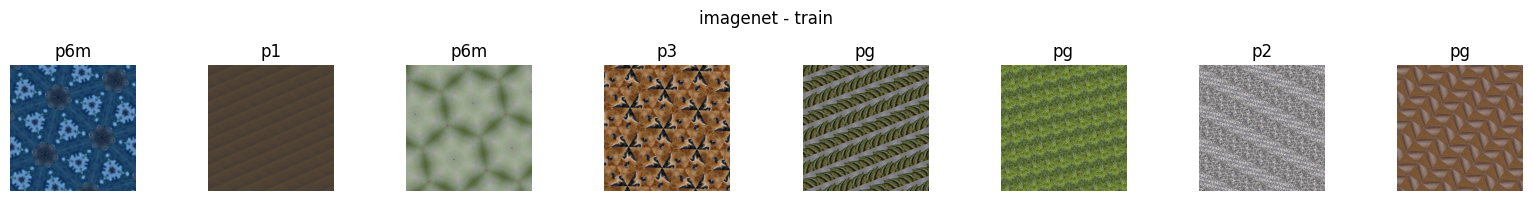

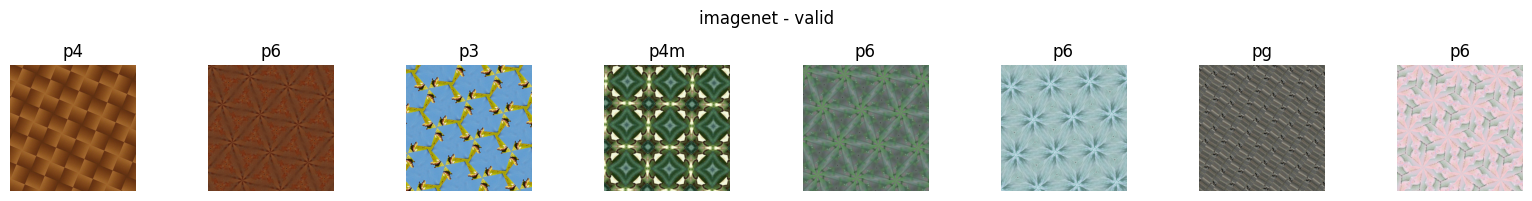

In [ ]:
training_specs['ds_size'] = 10000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 100K dataset

In [ ]:
training_specs['ds_size'] = 100000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 500K dataset

In [ ]:
training_specs['ds_size'] = 500000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 2 million dataset

In [ ]:
training_specs['ds_size'] = 2000000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)

### 5 million dataset

In [ ]:
training_specs['ds_size'] = 5000000
benchmark_task(task_name, model, training_specs=training_specs, ds_path_info=ds_path_info, wandb_specs=wandb_specs)